In [1]:
import pandas as pd

In [2]:
tree = pd.read_csv('tree.csv', header=None)
tree.columns = ['Type', 'Code', 'Unknown1', 'Description', 'Prob', 'Unknown2']
tree.head()

,Type,Code,Unknown1,Description,Prob,Unknown2
0,O,0,NaN,root,NaN,NaN
1,A,1,NaN,attack voting equipment,NaN,NaN
2,O,1.1,NaN,gather knowledge,NaN,NaN
3,T,1.1.1,X1,from insider,0.068889,2.0
4,A,1.1.2,NaN,from components,NaN,NaN


In [33]:
import networkx as nx

G = nx.DiGraph()

for index, row in tree.iterrows():
    
    node = row['Code'].strip()
    
    G.add_node(node, node_type=row['Type'], prob=row['Prob'])
    
    if node == '0':
        continue
        
    u = '.'.join(node.split('.')[:-1])
    v = '.'.join(node.split('.'))
    
    if not u:
        G.add_edge('0',v)
    else:
        G.add_edge(u,v)
        


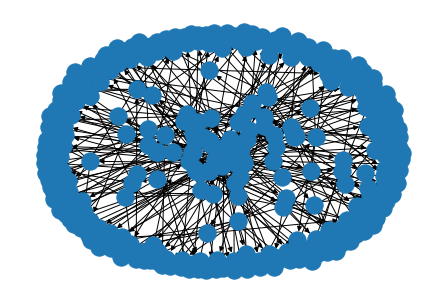

In [34]:
nx.draw(G)

In [35]:
bfs = list(nx.bfs_edges(G, source='0'))
bfs.reverse()

In [36]:
bfs = list(n[1] for n in bfs)

In [56]:
import numpy as np

for node in bfs:
    if G.nodes[node]['node_type'] in ['A', 'O']:
        
        n_probs = []
        
        for n in G.neighbors(node):
            n_probs.append(G.nodes[n]['prob'])
                    
        if G.nodes[node]['node_type'] == 'A':
            G.nodes[node]['prob'] = np.prod(n_probs)
            
        if G.nodes[node]['node_type'] == 'O':
            #https://stackoverflow.com/questions/56266279/compute-probability-of-union-of-n-events-from-array
            diffs = list(1-n for n in n_probs)
            G.nodes[node]['prob'] = np.prod(diffs)

#finish with root node
n_probs = []
for n in G.neighbors('0'):
    n_probs.append(G.nodes[n]['prob'])
G.nodes['0']['prob'] = np.sum(n_probs)

In [59]:
data = []
for node in G.nodes():
    prob = G.nodes[node]['prob']
    kind = G.nodes[node]['node_type']
    inputs = list(zip(list(G.neighbors(node)), list(G.nodes[n]['prob'] for n in G.neighbors(node))))
    data.append((node,prob,kind, inputs))
    
results = pd.DataFrame(data, columns=['Code','Probability','Type','Inputs'])
results.to_csv('results.csv')

In [70]:
import copy

def traverse(node):
    if node OR:
        new_paths = copy.deepcopy(paths)
        for child of node:
            addition = copy.deepcopy(paths)
            for path in addition:
                path.append(child)
            new_paths = new_paths+addition
        paths = new_paths
            
    else:
        for each path in paths:
            for each children in node:
                path.append(node)
                
#node=1.1
def get_scenarios(node):
    paths = [node]
    for all_subnodes in bfs_order including root node:
        traverse(sub_node, paths)

SyntaxError: invalid syntax (<ipython-input-70-eccfffbf2ae4>, line 6)

In [243]:
import copy
import time

def get_scenarios(node):
    paths = [[node]]
    bfs = [node] + list(n[1] for n in list(nx.bfs_edges(G, source=node)))
    for node in bfs:
        paths = traverse(node, paths)
    return(paths)
        
def traverse(node, paths):
#     time.sleep(1)
    if G.nodes[node]['node_type'] == 'O':
        new_paths = []
        to_remove = []
        for i in range(len(paths)):
            path = paths[i]
            if node in path[-len(list(G.neighbors(list(G.pred['1.3.2.4'])[0]))):]:
                to_remove.append(i)
                for n in G.neighbors(node):
                    new_paths.append(path+[n])
        for d in sorted(to_remove, reverse=True):
            paths.pop(d)
        paths = paths+new_paths
        
                    
                
#         new_paths = list(p for p in paths if p[-1]==node)
#         for n in G.neighbors(node):
#             addition = copy.deepcopy(paths)
#             for path in addition:
#                 path.append(n)
#             new_paths = new_paths+addition
#         paths = new_paths
            
    if G.nodes[node]['node_type'] == 'A':
        for path in paths:
            if node in path:
                for n in G.neighbors(node):
                    path.append(n)
    return paths
                
scenarios = get_scenarios('0')
print("*-"*25)
# for i in range(len(scenarios)):
#     print("Scenario",i+1,":",scenarios[i],"\n")
print(len(set(tuple(row) for row in scenarios)))

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
16142


In [229]:
len(list(G.neighbors(list(G.pred['1.3.2.4'])[0])))

6

In [230]:
l = [1,2,3,4,5]

In [217]:
l[-2]

4